In [36]:
from GridGraph import GridGraph
import networkx as nx
from Simplifiers import *
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def custom_example(path_decomposition = True,optimize_row_order = True, do_simplifiers = True, optimize_crossings_no_edge = True):
    adj_mat = np.array([[0, 1, 0, 1,1],
                             [1, 0, 1, 0, 0],
                             [0, 1, 0, 1, 1],
                             [1, 0, 1, 0, 0],
                             [1,0,1,0,0]])
    g = GridGraph(5,2)
    #g.col_order = np.array([1,3,0,2,4])
    #g.row_order = np.array([1,3,0,2,4])
    if path_decomposition:
        g.set_cols_rows_with_path_decomposition(adj_mat)
    #g.col_order = np.array([1,3,0,2,4])
    #g.row_order = np.array([1,3,0,2,4])
    if optimize_row_order:
        g.optimize_row_order(adj_mat)
    print( g.row_order)
    g.populate_graph(adj_mat, list(g.row_order), list(g.col_order))
    if optimize_crossings_no_edge:
        g.optimize_crossings_no_edge(adj_mat)
    if do_simplifiers:
        apply_simplifiers(g)
    g.draw()

[0 1 2 3 4]


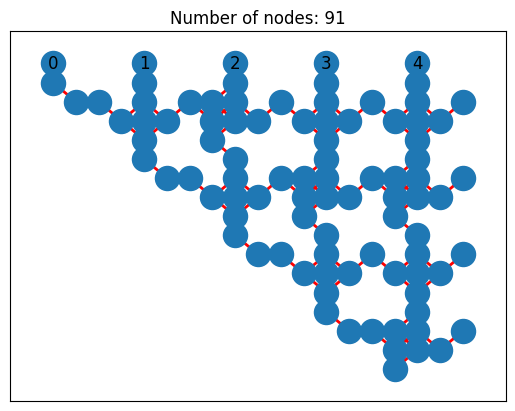

In [38]:
custom_example(False, False, False, False)

[1 3 4 0 2]


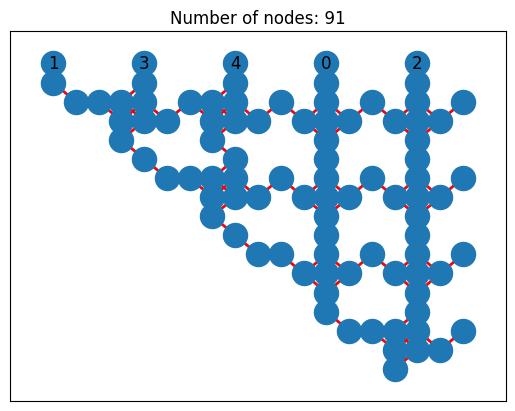

In [33]:
custom_example(True, False, False, False)

[4 3 1 2 0]


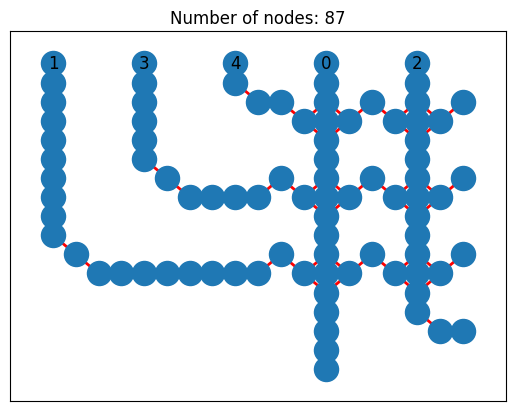

In [26]:
custom_example(True, True, False, False)

[4 3 1 2 0]


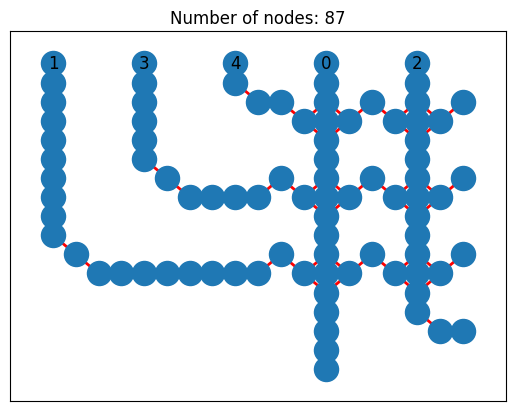

In [27]:
custom_example(True, True, False, True)

[4 3 1 2 0]


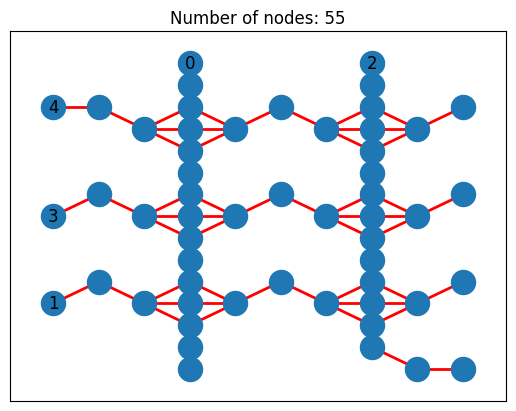

In [28]:
custom_example(True, True, True, True)

**Numerical simulations** :

In [3]:
def generate_Graph(n, adj_mat, optimize_row_order = True, do_simplifiers = True, optimize_crossings_no_edge = True):
    g = GridGraph(n)
    if optimize_row_order:
        g.set_cols_rows_with_path_decomposition(adj_mat)
        g.optimize_row_order(adj_mat)
    g.populate_graph(adj_mat, list(g.row_order), list(g.col_order))
    if optimize_crossings_no_edge:
        g.optimize_crossings_no_edge(adj_mat)
    if do_simplifiers:
        apply_simplifiers(g)
    return g

In [4]:
def count_nodes(G: GridGraph):
    occupied_nodes = [node for node in G.graph.nodes if G.graph.nodes[node]['occupied']]
    return len(occupied_nodes)

p = 0.3

In [6]:
def average_over_graphs(n, num_graphs):
    results_no_opt = []
    results_opt1 = []
    results_opt1and2 = []


    for _ in range(num_graphs):
        # Generate an Erdos-Renyi graph 
        adj_mat = np.zeros((n, n), dtype=int)
        for i in range(n):
            for j in range(i+1, n):
                if np.random.rand() < p:
                    adj_mat[i, j] = 1
                    adj_mat[j, i] = 1
        
        # Calculate and store results for each function
        G_no_opt = generate_Graph(n, adj_mat=adj_mat, optimize_row_order= False, do_simplifiers= False, optimize_crossings_no_edge = False)
        G_opt1 = generate_Graph(n, adj_mat=adj_mat, optimize_row_order= True, do_simplifiers= True, optimize_crossings_no_edge = False)
        G_opt1and2 = generate_Graph(n, adj_mat=adj_mat, optimize_row_order= True, do_simplifiers= True, optimize_crossings_no_edge = True)
        results_no_opt.append(count_nodes(G_no_opt))
        results_opt1.append(count_nodes(G_opt1))
        results_opt1and2.append(count_nodes(G_opt1and2))

    # Calculate the average results
    avg_no_opt = np.mean(results_no_opt)
    avg_opt1 = np.mean(results_opt1)
    avg_opt1and2 = np.mean(results_opt1and2)

    return avg_no_opt, avg_opt1, avg_opt1and2

Plotting for small graphs :

In [13]:
# Sizes of Erdos-Renyi graphs
sizes = np.array([5, 6, 7, 8, 9, 10])

# Number of graphs to generate for each size
num_graphs = 50

# Calculate averages for each size
average_results = [average_over_graphs(n, num_graphs) for n in sizes]

# Unpack results
avg_no_opt_values, avg_opt1_values, avg_opt1and2_values = zip(*average_results)

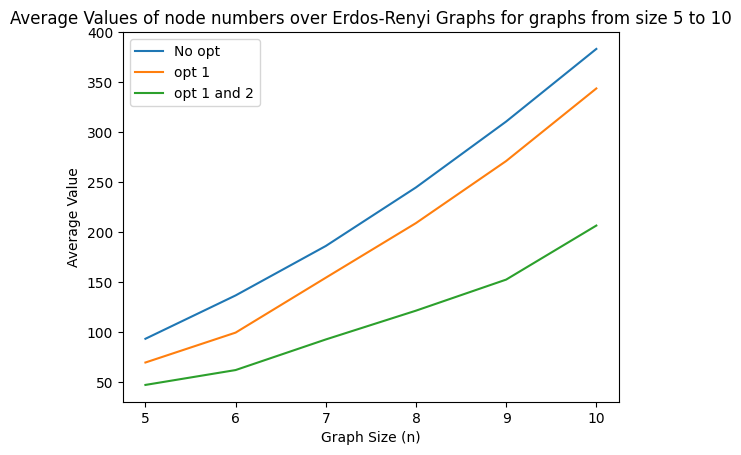

In [14]:
# Plotting
plt.plot(sizes, avg_no_opt_values, label='No opt')
plt.plot(sizes, avg_opt1_values, label='opt 1')
plt.plot(sizes, avg_opt1and2_values, label = 'opt 1 and 2')
plt.plot(sizes, 8 * sizes * (sizes - 1) / 2, label = 'Max : 8 x n(n - 1) / 2')
plt.xlabel('Graph Size (n)')
plt.ylabel('Average Value')
plt.title('Average Values of node numbers over Erdos-Renyi Graphs for graphs from size 5 to 10')
plt.legend()
plt.show()

Plotting for bigger graphs:

In [16]:
# Sizes of Erdos-Renyi graphs
sizes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Number of graphs to generate for each size
num_graphs = 30

# Calculate averages for each size
average_results = [average_over_graphs(n, num_graphs) for n in sizes]

# Unpack results
avg_no_opt_values, avg_opt1_values, avg_opt1and2_values = zip(*average_results)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\ayman\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ayman\AppData\Local\Temp\ipykernel_33004\749213409.py", line 8, in <module>
    average_results = [average_over_graphs(n, num_graphs) for n in sizes]
  File "C:\Users\ayman\AppData\Local\Temp\ipykernel_33004\749213409.py", line 8, in <listcomp>
    average_results = [average_over_graphs(n, num_graphs) for n in sizes]
  File "C:\Users\ayman\AppData\Local\Temp\ipykernel_33004\2878500669.py", line 19, in average_over_graphs
    G_opt1and2 = generate_Graph(n, adj_mat=adj_mat, optimize_row_order= True, do_simplifiers= True, optimize_crossings_no_edge = True)
  File "C:\Users\ayman\AppData\Local\Temp\ipykernel_33004\3956440355.py", line 4, in generate_Graph
    g.set_cols_rows_with_path_decomposition(adj_mat)
  File "c:\Users\ayman\Desktop\EA\Nouveau dossier\Gri

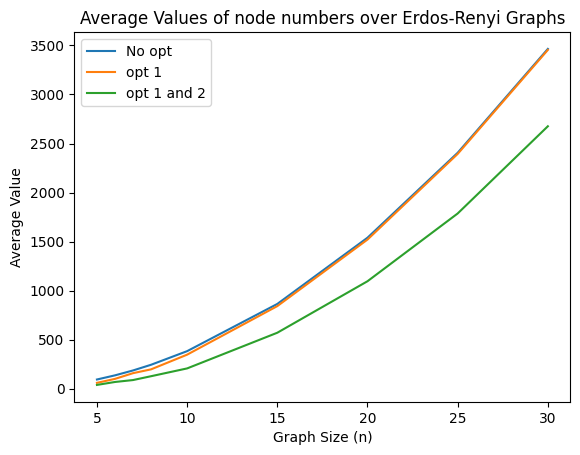

In [ ]:
# Plotting
plt.plot(sizes, avg_no_opt_values, label='No opt')
plt.plot(sizes, avg_opt1_values, label='opt 1')
plt.plot(sizes, avg_opt1and2_values, label = 'opt 1 and 2')
plt.xlabel('Graph Size (n)')
plt.ylabel('Average Value')
plt.title('Average Values of node numbers over Erdos-Renyi Graphs from size 5 to 40')
plt.legend()
plt.show()